In [19]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

In [20]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [21]:
df = pd.read_csv("../../6_Leveled_Datasets/Leveled_Androcrawl.csv")

1 >> 3146

0 >> 1495

### Conjunto de dados de validação (30%)

In [22]:
3146 * 0.3

943.8

In [23]:
1720 * 0.3

516.0

In [24]:
Bval = df[df["class"] == 0].sample(n=944, random_state=42)
Mval = df[df["class"] == 1].sample(n=516, random_state=42)
validation = pd.concat([Bval,Mval])
indexes = validation["class"].index.tolist()
validation = shuffle(validation)
validation = validation.reset_index()
validation.drop(columns=["index"], inplace=True)
x_validation = validation.drop(columns=["class"])
y_validation = validation["class"]

In [25]:
df.drop(index=indexes, inplace=True)

### Conjunto de dados de Treino (40%)

In [26]:
(3146 - 944) - 944

1258

In [27]:
(1720 - 516) - 516

688

In [28]:
Btrain = df[df["class"] == 0].sample(n=1258, random_state=42)
Mtrain = df[df["class"] == 1].sample(n=688, random_state=42)
train = pd.concat([Btrain,Mtrain])
indexes = train["class"].index.tolist()
train = shuffle(train)
train = train.reset_index()
train.drop(columns=["index"], inplace=True)
x_train = train.drop(columns=["class"])
y_train = train["class"]

In [29]:
df.drop(index=indexes, inplace=True)

In [30]:
df = shuffle(df)

In [31]:
df = df.reset_index()

In [32]:
df.drop(columns=["index"], inplace=True)

### Conjunto de dados de Teste (30%)

In [33]:
df['class'].value_counts()

0    944
1    516
Name: class, dtype: int64

In [34]:
x_test = df.drop(columns=["class"])
y_test = df["class"]

In [35]:
RF = RandomForestClassifier()

In [36]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
print("Curva ROC >> ", roc_auc_score(y_test, RF.predict(x_test))*100, "%")

Curva ROC >>  52.31572723689397 %


### Otimização de Hiperparâmetros

In [38]:
params_grid = {'n_estimators': 1800,
               'min_samples_split': 2,
               'min_samples_leaf': 1,
               'max_features': 'auto',
               'max_depth': 20,
               'bootstrap': False}

In [39]:
ORF = RandomForestClassifier(**params_grid)

In [40]:
ORF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=1800)

In [41]:
print("Curva ROC >> ", roc_auc_score(y_test, ORF.predict(x_test))*100, "%")

Curva ROC >>  52.44875837603469 %


/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/overycall/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use o

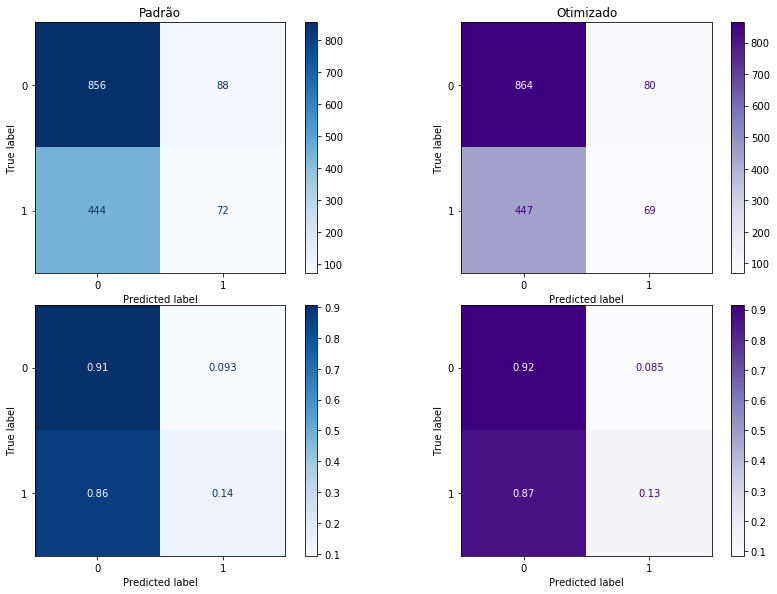

In [42]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,8))
plt.tight_layout()
ax1.set(title="Padrão")
ax2.set(title="Otimizado")
plot_confusion_matrix(RF, x_test, y_test,ax=ax1, cmap = "Blues", values_format="d")
plot_confusion_matrix(ORF, x_test, y_test, ax=ax2, cmap= "Purples", values_format="d")
plot_confusion_matrix(RF, x_test, y_test,ax=ax3, cmap = "Blues", normalize = "true")
plot_confusion_matrix(ORF, x_test, y_test, ax=ax4, cmap= "Purples", normalize = "true")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=be34dc1b-561d-4c90-bae1-66eed919bb55' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>